데이터 가져오기

In [8]:
f=open('토지1.txt','r')
story=f.read()
#print(story)
print(type(story))

<class 'str'>


워드 클라우드 그리기

In [4]:
!pip list  #cmd에서 쓰는 명령어는 !를 사용하면됨

Package                            Version  
---------------------------------- ---------
alabaster                          0.7.12   
anaconda-client                    1.7.2    
anaconda-navigator                 1.9.7    
anaconda-project                   0.8.3    
app                                0.0.1    
asn1crypto                         0.24.0   
astroid                            2.2.5    
astropy                            3.2.1    
atomicwrites                       1.3.0    
attrs                              19.1.0   
autopep8                           1.4.4    
Babel                              2.7.0    
backcall                           0.1.0    
backports.functools-lru-cache      1.5      
backports.os                       0.1.1    
backports.shutil-get-terminal-size 1.0.0    
backports.tempfile                 1.0      
backports.weakref                  1.0.post1
beautifulsoup4                     4.7.1    
bitarray                           0.9.3    
bkcharts  

In [11]:
!pip install wordcloud

In [12]:
!pip show wordcloud

Name: wordcloud
Version: 1.5.0
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: Andreas Mueller
Author-email: t3kcit+wordcloud@gmail.com
License: MIT
Location: c:\programdata\anaconda3\lib\site-packages
Requires: numpy, pillow
Required-by: 


In [13]:
#워드클라우드에서 제외하고 싶은 단어
stopwords_kr =['하지만','그러나','그리고','있다','다']

워드클라우드 설정

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline  
#미리보기? vsc에서는 자동으로뜸

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600):
    wordcloud = WordCloud(
                          font_path = 'C:\Windows\Fonts\malgunsl.ttf', #한글 폰트는 깨지기때문에 한글폰트 저장 (c/windows/Fonts)
                          stopwords = stopwords_kr,
                          background_color=backgroundcolor,
                          width = width, height= height). generate(data)  #워드클라우드로 만들고 싶은 문자열 삽입
    print(wordcloud.words_) #들어오는 문자열을 받아서 자르고 끼리끼리 묶고 카운트(제일 많은 것을 1.0)
    plt.figure(figsize= (15, 10)) #x,y축
    plt.imshow(wordcloud)
    plt.axis("off") #워드클라우드는 x,y축이 필요가 없어서 off
    plt.show()

{'있었다': 1.0, '것이다': 0.5512820512820513, '용이는': 0.5384615384615384, '하고': 0.5352564102564102, '같은': 0.5192307692307693, '있는': 0.5160256410256411, '없는': 0.46474358974358976, '내가': 0.4391025641025641, '평산은': 0.4230769230769231, '그는': 0.38782051282051283, '했다': 0.3814102564102564, '다시': 0.34935897435897434, '하는': 0.34294871794871795, '말을': 0.33974358974358976, '어디': 0.3301282051282051, '것을': 0.32051282051282054, '그런': 0.3076923076923077, '용이': 0.30448717948717946, '가서': 0.2948717948717949, '것도': 0.28846153846153844, '하며': 0.28525641025641024, '그래': 0.2724358974358974, '강청댁은': 0.2724358974358974, '말했다': 0.2692307692307692, '일이': 0.2692307692307692, '말이': 0.26282051282051283, '눈을': 0.2532051282051282, '없다': 0.2467948717948718, '눈이': 0.2467948717948718, '없이': 0.2403846153846154, '없었다': 0.23717948717948717, '그리': 0.23076923076923078, '치수는': 0.23076923076923078, '하나': 0.22756410256410256, '무슨': 0.22756410256410256, '얼굴을': 0.22435897435897437, '누가': 0.22435897435897437, '나는': 0.22115384615384615

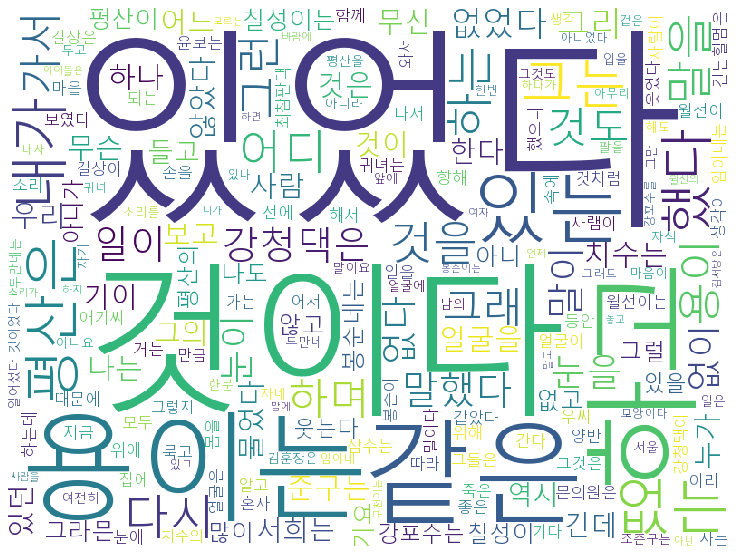

Wall time: 1.39 s


In [15]:
%time displayWordCloud(story)

불용어 제거

https://github.com/lovit/soynlp

In [35]:
!pip install soynlp

In [36]:
!pip show soynlp

Name: soynlp
Version: 0.0.493
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: c:\programdata\anaconda3\lib\site-packages
Requires: scipy, numpy, scikit-learn, psutil
Required-by: 


In [16]:
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor()
nouns1 = noun_extractor.train_extract([story]) # list of str like
from soynlp.noun import NewsNounExtractor
noun_extractor = NewsNounExtractor()
nouns2 = noun_extractor.train_extract([story]) # list of str like

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (5717, 2810) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 966 nouns are extracted
used default noun predictor; Sejong corpus based logistic predictor
C:/ProgramData/Anaconda3/lib/site-packages/soynlp
local variable 'f' referenced before assignment
local variable 'f' referenced before assignment
scan vocabulary ... 
done (Lset, Rset, Eojeol) = (65140, 27577, 33963)
predicting noun score was done                                        
before postprocessing 10178
_noun_scores_ 2236
checking hardrules ... done / 2236떡볶+(이)), NVsubE (사기(당)+했다) ... done
after postprocessing 1383
extracted 4 compounds from eojeolss ... 2000 / 2675

In [46]:
nouns1

{'친정': NounScore_v1(frequency=10, score=0.7319646666666667, known_r_ratio=0.8571428571428571),
 '입김': NounScore_v1(frequency=6, score=0.5669251666666667, known_r_ratio=1.0),
 '역적': NounScore_v1(frequency=3, score=0.999867, known_r_ratio=0.5),
 '흥분': NounScore_v1(frequency=7, score=0.9265445714285715, known_r_ratio=1.0),
 '지경': NounScore_v1(frequency=10, score=0.8212550000000001, known_r_ratio=0.9),
 '어미': NounScore_v1(frequency=37, score=0.9316212916666666, known_r_ratio=0.8888888888888888),
 '기름': NounScore_v1(frequency=12, score=0.8346363333333334, known_r_ratio=0.3333333333333333),
 '이력': NounScore_v1(frequency=6, score=0.9993208333333333, known_r_ratio=1.0),
 '감정': NounScore_v1(frequency=11, score=0.5858074444444444, known_r_ratio=1.0),
 '그년': NounScore_v1(frequency=30, score=0.8090216153846153, known_r_ratio=1.0),
 '여자': NounScore_v1(frequency=99, score=0.7979806250000002, known_r_ratio=0.9846153846153847),
 '산중': NounScore_v1(frequency=4, score=0.9998064999999999, known_r_ratio=1

In [50]:
print(type(nouns1))

<class 'dict'>


list = str.split(): 문자열 -> 리스트, 공백 시 스페이스 기준

''.join(list) : 리스트에서 문자열으로

{'그년': 1.0, '세상': 1.0, '구천': 1.0, '제집': 1.0, '큰일': 1.0, '강청': 1.0, '사랑': 1.0, '그기': 1.0, '자식': 1.0, '별당': 1.0, '지랄': 1.0, '구천이': 1.0, '이서방': 1.0, '울타리': 1.0, '친정': 0.5, '입김': 0.5, '역적': 0.5, '흥분': 0.5, '지경': 0.5, '어미': 0.5, '기름': 0.5, '이력': 0.5, '감정': 0.5, '여자': 0.5, '산중': 0.5, '광경': 0.5, '어깨': 0.5, '낯빛': 0.5, '그릇': 0.5, '손등': 0.5, '한숨': 0.5, '젊은': 0.5, '뗏목': 0.5, '황금': 0.5, '중놈': 0.5, '목숨': 0.5, '장날': 0.5, '술청': 0.5, '고추': 0.5, '촛불': 0.5, '환장': 0.5, '새벽': 0.5, '담배': 0.5, '출신': 0.5, '뜻밖': 0.5, '한돌': 0.5, '미워': 0.5, '부탁': 0.5, '물감': 0.5, '서방': 0.5, '귀신': 0.5, '기억': 0.5, '조선': 0.5, '내일': 0.5, '길목': 0.5, '한산': 0.5, '기분': 0.5, '막연': 0.5, '사내': 0.5, '개멩': 0.5, '착각': 0.5, '이만': 0.5, '미련': 0.5, '불빛': 0.5, '멀쩡': 0.5, '종적': 0.5, '왜눔': 0.5, '괄시': 0.5, '신발': 0.5, '번째': 0.5, '무릎': 0.5, '명창': 0.5, '장지': 0.5, '언덕': 0.5, '장님': 0.5, '소용': 0.5, '은근': 0.5, '부지': 0.5, '상전': 0.5, '다름': 0.5, '살해': 0.5, '생각': 0.5, '우물': 0.5, '마루': 0.5, '안주': 0.5, '의젓': 0.5, '사공': 0.5, '도랑': 0.5, '읍내': 0.5, '바둑': 0.5, '사실': 

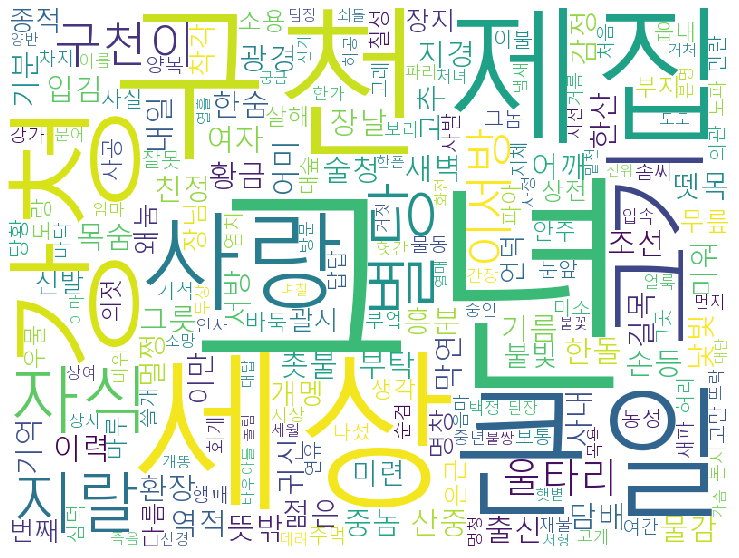

Wall time: 892 ms


In [51]:
%time displayWordCloud(' '.join(nouns1))

{'울타리': 1.0, '아침': 1.0, '바람': 1.0, '마음': 1.0, '사랑': 1.0, '모두': 1.0, '서서방': 1.0, '세상': 1.0, '제집': 1.0, '자식': 1.0, '곡식': 1.0, '자리': 1.0, '얼굴': 1.0, '구천': 1.0, '별당': 1.0, '날씨': 1.0, '이놈': 1.0, '사냥': 1.0, '아씨': 1.0, '그년': 1.0, '참말': 1.0, '봉순어매': 1.0, '조상': 1.0, '사램': 1.0, '내일': 1.0, '자네': 1.0, '할일': 1.0, '연곡사': 1.0, '노스님': 1.0, '그기': 1.0, '친정': 1.0, '이서방': 1.0, '까닭인지': 0.5, '긁적긁적': 0.5, '고래고래': 0.5, '참판어른': 0.5, '어둠': 0.5, '발소리': 0.5, '인사': 0.5, '마을': 0.5, '마을길': 0.5, '어른': 0.5, '어른들': 0.5, '중천': 0.5, '무렵': 0.5, '차례': 0.5, '이웃': 0.5, '음식': 0.5, '한나절': 0.5, '이때': 0.5, '타작': 0.5, '타작마당': 0.5, '노인들': 0.5, '채비': 0.5, '아무래': 0.5, '수밖': 0.5, '식구': 0.5, '자신': 0.5, '고개': 0.5, '황금': 0.5, '황금빛': 0.5, '물결': 0.5, '들판': 0.5, '풀밭': 0.5, '출입': 0.5, '남녀': 0.5, '강아지': 0.5, '돼지': 0.5, '새들': 0.5, '장단': 0.5, '꽹과리': 0.5, '거리': 0.5, '최참판댁': 0.5, '틀림': 0.5, '허리': 0.5, '허리끈': 0.5, '하루': 0.5, '근심': 0.5, '늙은이들': 0.5, '뒷간': 0.5, '젊은': 0.5, '벌써': 0.5, '읍내': 0.5, '마리': 0.5, '씨름판': 0.5, '햇빛': 0.5, '방문': 0.5, '장지': 0.5,

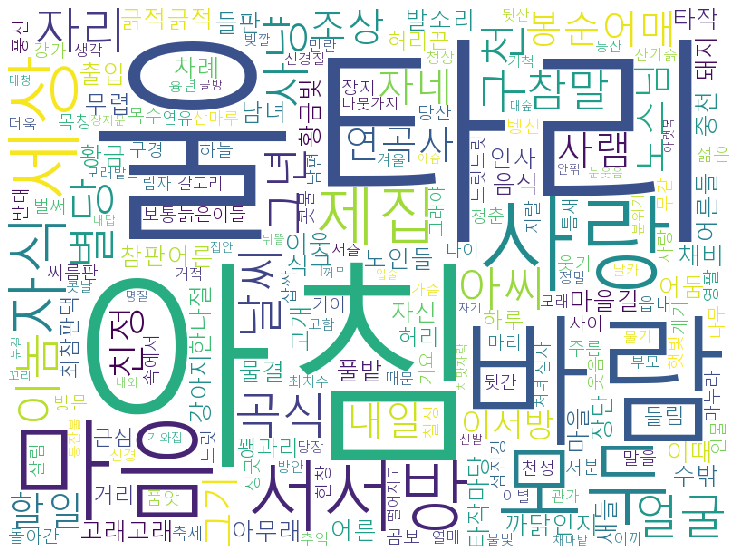

Wall time: 917 ms


In [52]:
%time displayWordCloud(' '.join(nouns2))

4. 특정 이미지 형태로 워드 클라우드 그리기

In [26]:
from PIL import Image
import numpy

In [43]:
img = Image.open('heart.png')
img_array = numpy.array(img)  #넘파이 배열로 투명한 곳과 아닌 곳을 구분

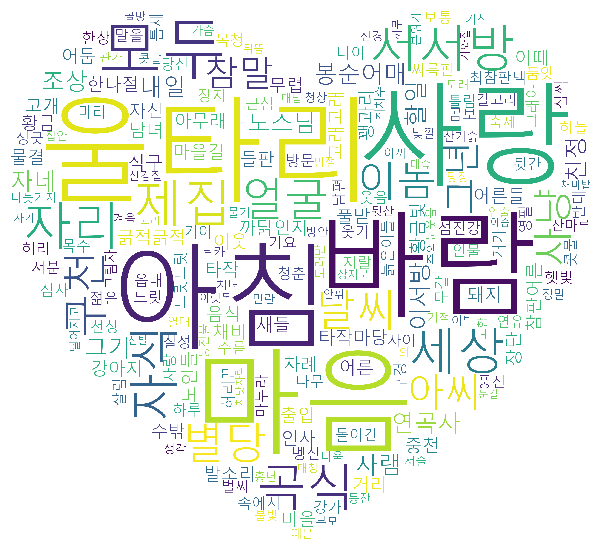

In [44]:
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgunsl.ttf', #한글 폰트는 깨지기때문에 한글폰트 저장 (c/windows/Fonts)
                      stopwords = stopwords_kr,
                      background_color='white',
                      mask=img_array,
                      width = 800, height= 600). generate(' '.join(nouns2))
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#이미지 결과 저장
wordcloud.to_file("test_heart.png")

In [45]:
import os, sys

In [79]:
import urllib.request
import json
client_id = "83YbuEUk8Of3ulOlhoSE"
client_secret = "9TCI3CQOpw"
encText = urllib.parse.quote("제주")
url = "https://openapi.naver.com/v1/search/news.json?display=100&query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
jsonresponse = json.load(response)
if(rescode==200):
    response_body = response.read()
    #print(response_body.decode('utf-8'))
    items = jsonresponse['items']
    #print(items)
    heart = []
    for item in items:
        description = item['description']
        #print(description)
        heart.append(description)
else:
    print("Error Code:" + rescode)


used default noun predictor; Sejong corpus based logistic predictor
C:/ProgramData/Anaconda3/lib/site-packages/soynlp
local variable 'f' referenced before assignment
local variable 'f' referenced before assignment
scan vocabulary ... 
done (Lset, Rset, Eojeol) = (4860, 3153, 1810)
predicting noun score was done                                        
before postprocessing 342
_noun_scores_ 101
checking hardrules ... doneNsubJ (떡볶+(이)), NVsubE (사기(당)+했다) ... done
after postprocessing 53
extracted 0 compounds from eojeols

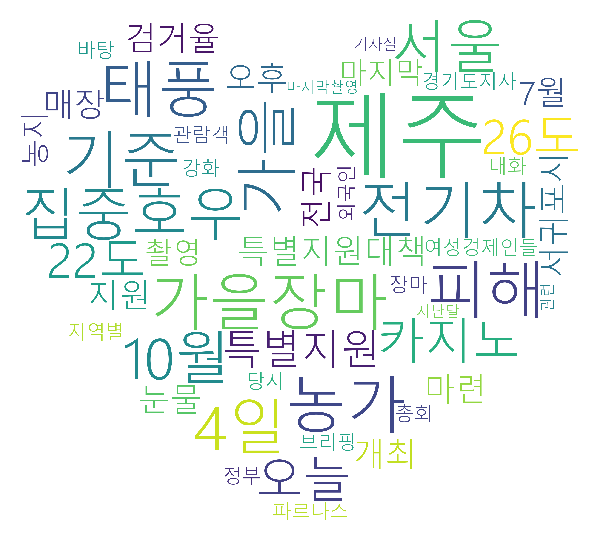

In [80]:
from soynlp.noun import NewsNounExtractor
noun_extractor = NewsNounExtractor()
heart = noun_extractor.train_extract(heart) # list of str like

img = Image.open('heart.png')
img_array = numpy.array(img)

wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\malgunsl.ttf', #한글 폰트는 깨지기때문에 한글폰트 저장 (c/windows/Fonts)
                      stopwords = stopwords_kr,
                      background_color='white',
                      mask=img_array,
                      width = 800, height= 600). generate(' '.join(heart))
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#이미지 결과 저장
wordcloud.to_file("test_heart.png")

import pandas as pd
import bs4 from BeautifulSoup

client_id = "83YbuEUk8Of3ulOlhoSE"
client_secret = "9TCI3CQOpw"
encText = urllib.parse.quote("제주")
url = "https://openapi.naver.com/v1/search/news.json?display=100&query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    data = response.read().decode('utf-8')
    c=json.loads(data)
    items = c['items']
    for item in items:
        bs=BeautifulSoup(item['title'],'html.parser')
        item['title'] = bs.get_text()
        bs=BeautifulSoup(item['description'],'html.parser')
        item['description'] = bs.get_text()
    df=pd.DataFrame(items)
    noun_extractor = NewsNounExtractor()\
    nouns = noun_extractor.train_extract(df['description'])
    displayWordCloud(' '.join(nouns))
else:
    print("Error Code:" + rescode)